In [1]:
#load dataset
import pandas as pd 
import numpy as np
df=pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
#EXPLORATORY DATA ANALYSIS

In [4]:
#finding first 5 rows
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [7]:
# Check data types and missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
#DATA VISUALIZATION

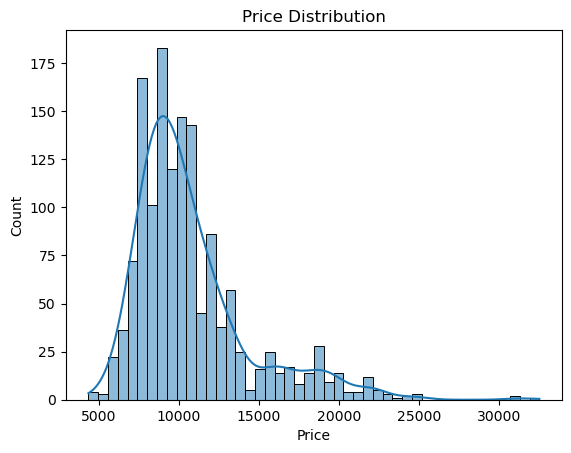

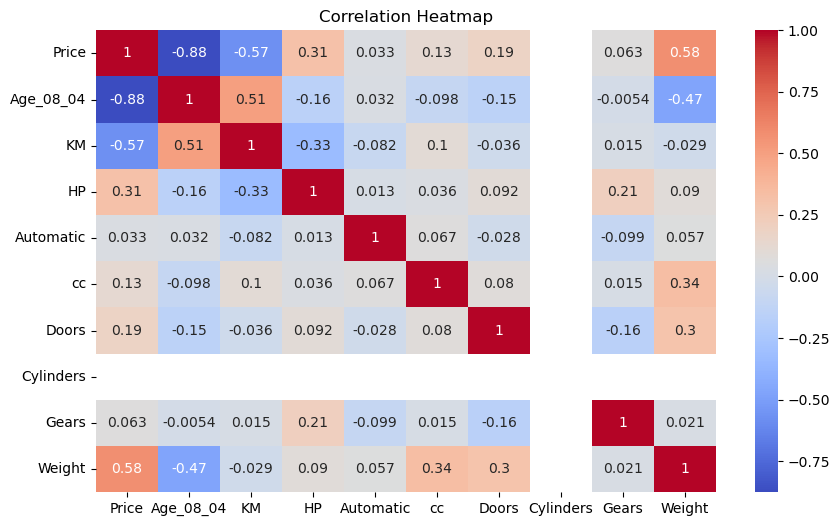

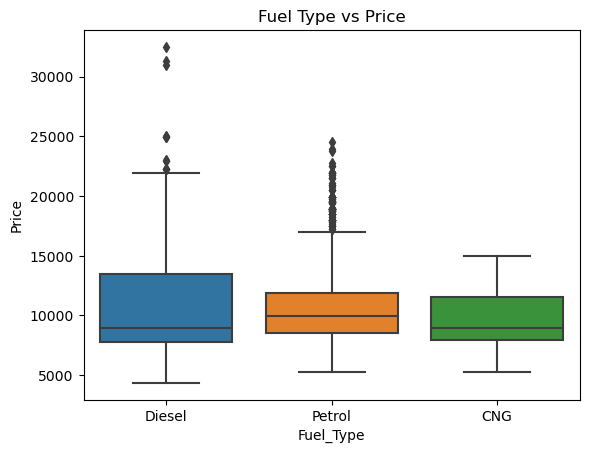

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of target variable
sns.histplot(df['Price'],kde=True)
plt.title("Price Distribution")
plt.show()
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# Boxplot of Price vs Fuel_Type
sns.boxplot(data=df, x='Fuel_Type', y='Price')
plt.title("Fuel Type vs Price")
plt.show()

In [13]:
#preprocessing
# Rename columns for consistency
df.rename(columns={
    'Age_08_04': 'Age', 
    'Fuel_Type': 'FuelType',
    'cc': 'CC',
    'Weight': 'Weight',
    'Price': 'Price'
}, inplace=True)

In [14]:
# One-hot encode categorical variable FuelType
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)
df_encoded

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [15]:
# Check data after encoding
df_encoded.head()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0


In [17]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns='Price')
y = df_encoded['Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 11) (288, 11) (1148,) (288,)


In [ ]:
#MODEL BUILDING

In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Model building function
def build_model(X_train, y_train, X_test, y_test, model_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    print(f"\n🔹 {model_name}")
    print(f"R² Score: {r2:.4f}")
    print("Intercept:", model.intercept_)
    print("Coefficients:\n", pd.Series(model.coef_, index=X_train.columns))
    return model
# 1: All features
model1 = build_model(X_train, y_train, X_test, y_test, "1: All Features")
# 2: Exclude Gears and Cylinders
X_train2 = X_train.drop(columns=['Gears', 'Cylinders'])
X_test2 = X_test.drop(columns=['Gears', 'Cylinders'])
model2 = build_model(X_train2, y_train, X_test2, y_test, "2: No Gears and Cylinders")
# 3: Only top correlated features
top_features = ['Age', 'KM', 'Weight', 'FuelType_Diesel']
X_train3 = X_train[top_features]
X_test3 = X_test[top_features]
model3 = build_model(X_train3, y_train, X_test3, y_test, "3: Top Correlated Features")



🔹 1: All Features
R² Score: 0.8349
Intercept: -14255.385993565233
Coefficients:
 Age               -1.208305e+02
KM                -1.623141e-02
HP                 1.403948e+01
Automatic          1.488309e+02
CC                -3.037219e-02
Doors             -6.031097e+01
Cylinders         -1.080025e-12
Gears              5.516007e+02
Weight             2.588496e+01
FuelType_Diesel   -6.854876e+01
FuelType_Petrol    1.370809e+03
dtype: float64

🔹 2: No Gears and Cylinders
R² Score: 0.8333
Intercept: -11856.940449151618
Coefficients:
 Age                -120.823078
KM                   -0.015927
HP                   15.777213
Automatic            93.081993
CC                   -0.030236
Doors               -84.483547
Weight               26.069186
FuelType_Diesel       4.202110
FuelType_Petrol    1453.694461
dtype: float64

🔹 3: Top Correlated Features
R² Score: 0.8219
Intercept: -10885.044316278334
Coefficients:
 Age                -118.962372
KM                   -0.017638
Weight    

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n {model_name} Evaluation")
    print("R² Score       :", r2_score(y_test, y_pred))
    print("MAE            :", mean_absolute_error(y_test, y_pred))
    print("MSE            :", mean_squared_error(y_test, y_pred))
    print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluate all three models
evaluate_model(model1, X_test, y_test, "1: All Features")
evaluate_model(model2, X_test2, y_test, "2: No Gears & Cylinders")
evaluate_model(model3, X_test3, y_test, "3: Top Correlated Features")



 1: All Features Evaluation
R² Score       : 0.8348888040611083
MAE            : 990.8872739193931
MSE            : 2203043.8231437015
RMSE           : 1484.265415329651

 2: No Gears & Cylinders Evaluation
R² Score       : 0.8332952678447364
MAE            : 992.3013394477402
MSE            : 2224306.0403935434
RMSE           : 1491.4107550884644

 3: Top Correlated Features Evaluation
R² Score       : 0.8218689722469819
MAE            : 994.0880614393259
MSE            : 2376764.689820101
RMSE           : 1541.6759354092874


In [ ]:
#LASSO & RIDGE REGRESSIONS

In [24]:
#importing libraries
from sklearn.linear_model import Ridge, Lasso

# Define and train Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test, "Ridge Regression")


 Ridge Regression Evaluation
R² Score       : 0.8351359377712331
MAE            : 990.733834202601
MSE            : 2199746.370233347
RMSE           : 1483.154196377891


In [25]:
# Define and train Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
evaluate_model(lasso, X_test, y_test, "Lasso Regression")


 Lasso Regression Evaluation
R² Score       : 0.8348946076447357
MAE            : 990.8879478176827
MSE            : 2202966.387152825
RMSE           : 1484.239329472449


In [26]:
print("\nLasso Coefficients:")
print(pd.Series(lasso.coef_, index=X_train.columns))


Lasso Coefficients:
Age                -120.830134
KM                   -0.016232
HP                   14.044676
Automatic           148.676633
CC                   -0.030392
Doors               -60.294596
Cylinders             0.000000
Gears               551.306478
Weight               25.883328
FuelType_Diesel     -68.186362
FuelType_Petrol    1370.744742
dtype: float64


In [27]:
#INTERVIEW QUESTIONS

In [ ]:
1. What is Normalization & Standardization and how is it helpful?

-->Normalization involves rescaling numerical data so that it falls within a specific range, typically between 0 and 1.
This is especially beneficial for algorithms sensitive to the magnitude of input features, such as K-Nearest Neighbors or
K-Means Clustering.

-->Standardization on the other hand, adjusts the data so that each feature has a mean of zero and a standard deviation of one.
This makes the data more comparable across features with different units or scales.
*Both methods help improve the training process by preventing features with larger scales from dominating those with smaller scales, 
thus leading to more stable and accurate models.

2. What techniques can be used to address multicollinearity in multiple linear regression?

-->To tackle multicollinearity, you can identify and remove variables that are highly correlated with others using tools
like the correlation matrix or calculating the Variance Inflation Factor (VIF).

-->Another strategy is to use dimensionality reduction methods like Principal Component Analysis (PCA),
which transform correlated features into a smaller set of uncorrelated components.

* Additionally, regularization methods such as Ridge Regression (L2 penalty) can be applied.
These methods shrink coefficient values and help manage multicollinearity by reducing the impact of redundant predictors.